### **# Exploratory Data Analysis and Hypothesis Testing**

This notebook explores the relationship between gaming, sleep duration, and cigarette consumption.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [8]:
df = pd.read_excel('/content/data(son).xlsx')
df.head()

,Date,Games Played,Game Hours,cigarettes smoked,Sleep Hours
0,2025-03-16,4,2.2,10,7.0
1,2025-03-17,4,2.3,11,6.4
2,2025-03-18,3,1.3,9,7.1
3,2025-03-19,5,2.6,6,8.0
4,2025-03-20,9,4.7,13,6.3


IQR Method Outlier Detection


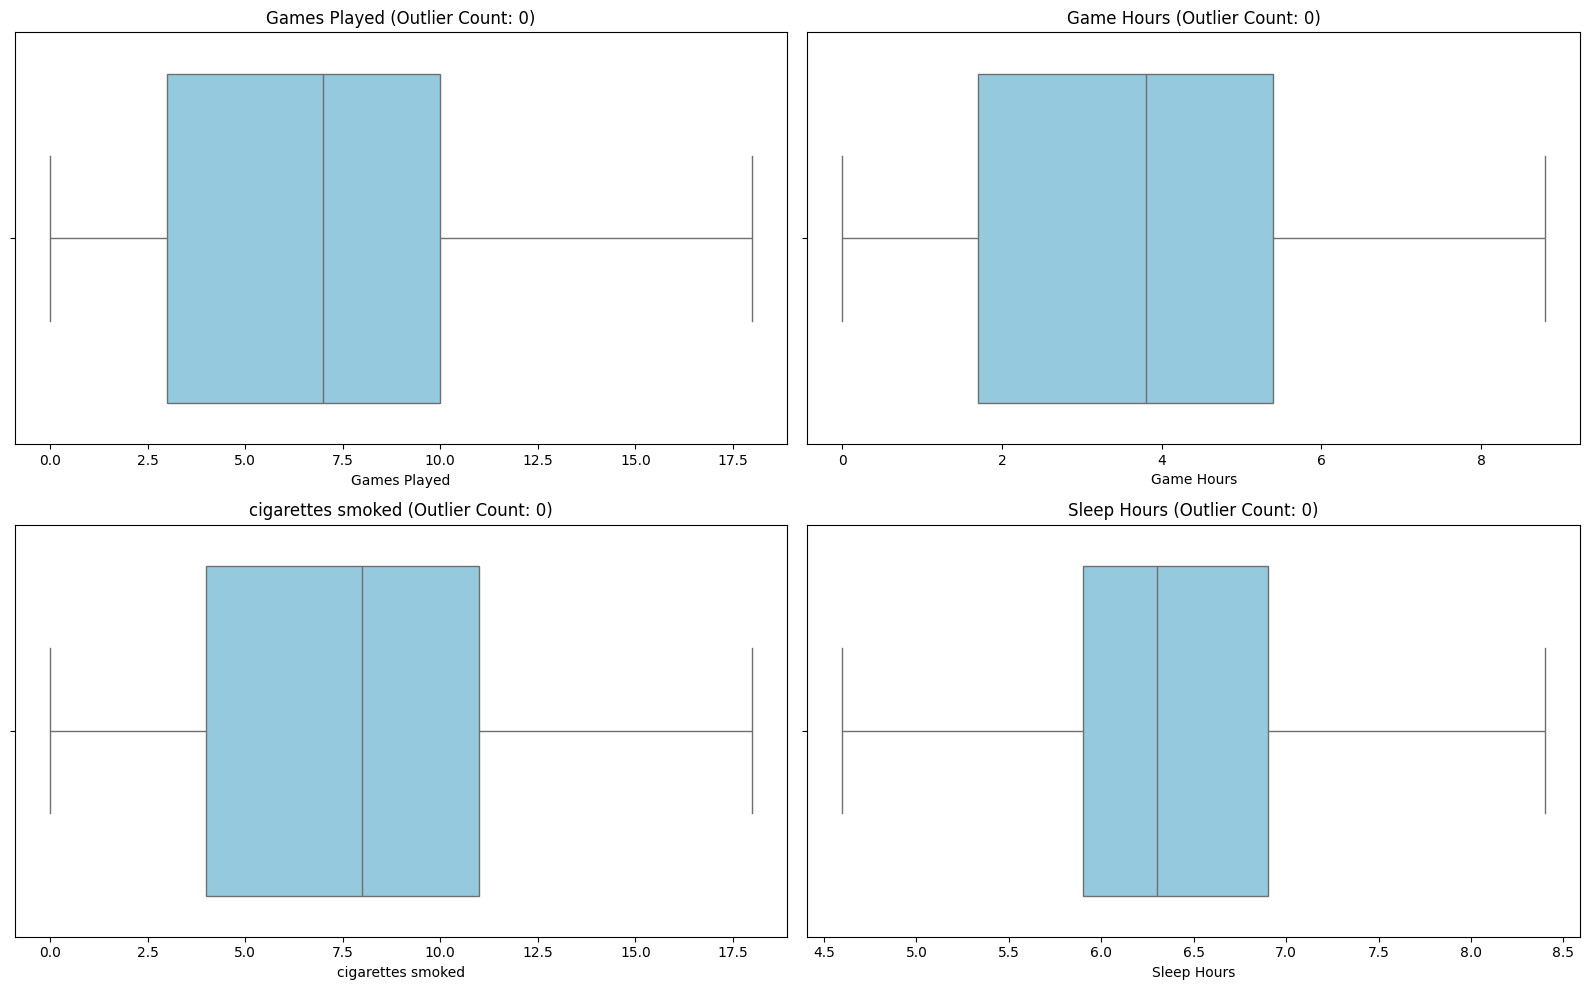


 Games Played summary:
IQR: 7.0
Lower Bound: -7.5
Upper Bound: 20.5
Outlier Count: 0
Outlier Indexes: []

 Game Hours summary:
IQR: 3.7
Lower Bound: -3.8500000000000005
Upper Bound: 10.950000000000001
Outlier Count: 0
Outlier Indexes: []

 cigarettes smoked summary:
IQR: 7.0
Lower Bound: -6.5
Upper Bound: 21.5
Outlier Count: 0
Outlier Indexes: []

 Sleep Hours summary:
IQR: 1.0
Lower Bound: 4.4
Upper Bound: 8.4
Outlier Count: 0
Outlier Indexes: []


In [12]:
outlier_summary = {}

plt.figure(figsize=(16, 10))

for i, column in enumerate(numeric_columns, 1):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]


    outlier_summary[column] = {
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": len(outliers),
        "Outlier Indexes": outliers.index.tolist()
    }


    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color="skyblue")
    plt.title(f"{column} (Outlier Count: {len(outliers)})")

plt.tight_layout()
plt.show()


for col, summary in outlier_summary.items():
    print(f"\n {col} summary:")
    for key, value in summary.items():
        print(f"{key}: {value}")

## Correlation Heatmap

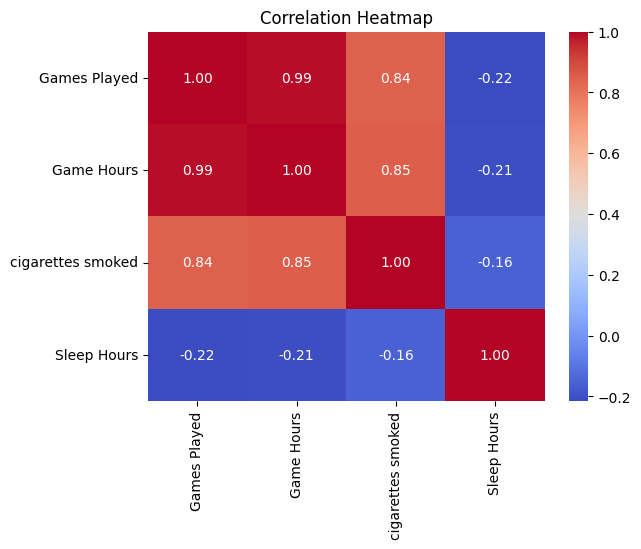

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.grid(False)
plt.title('Correlation Heatmap')
plt.show()

## Histogram of Cigarettes Smoked

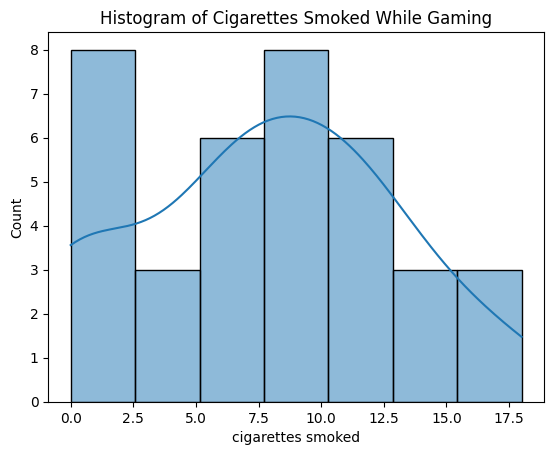

In [ ]:
sns.histplot(df['cigarettes smoked'], kde=True)
plt.xlabel('Cigarettes Smoked')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Histogram of Cigarettes Smoked While Gaming')
plt.show()

## Game Hours vs Cigarettes Smoked

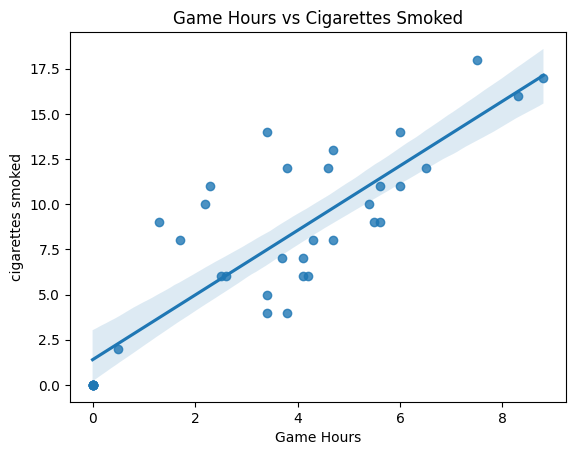

In [ ]:
sns.regplot(x='Game Hours', y='cigarettes smoked', data=df)
plt.xlabel('Cigarettes Smoked')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Game Hours vs Cigarettes Smoked')
plt.show()

## Game Hours vs Sleep Hours

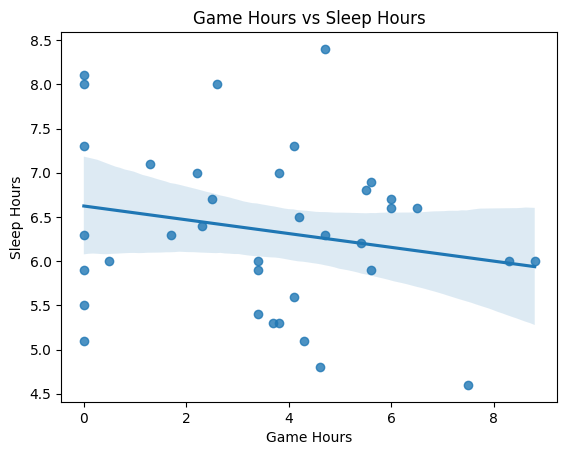

In [ ]:
sns.regplot(x='Game Hours', y='Sleep Hours', data=df)
plt.xlabel('Game Hours')
plt.ylabel('Sleep Hours')
plt.grid(True)
plt.title('Game Hours vs Sleep Hours')
plt.show()

### **## Hypothesis 1: Does playing games reduce sleep duration?**

In [ ]:
corr, p = pearsonr(df['Game Hours'], df['Sleep Hours'])
print(f'Pearson r: {corr:.2f}, p-value: {p:.4g}')
X = sm.add_constant(df['Game Hours'])
model = sm.OLS(df['Sleep Hours'], X).fit()
print(model.summary())

Pearson r: -0.21, p-value: 0.2181
                            OLS Regression Results                            
Dep. Variable:            Sleep Hours   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.573
Date:                Tue, 13 May 2025   Prob (F-statistic):              0.218
Time:                        14:31:42   Log-Likelihood:                -48.374
No. Observations:                  37   AIC:                             100.7
Df Residuals:                      35   BIC:                             104.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6

### **## Hypothesis 2: Does playing more games increase cigarettes smoked while gaming?**

In [ ]:
corr, p = pearsonr(df['Game Hours'], df['cigarettes smoked'])
print(f'Pearson r: {corr:.2f}, p-value: {p:.4g}')
X = sm.add_constant(df['Game Hours'])
model = sm.OLS(df['cigarettes smoked'], X).fit()
print(model.summary())

Pearson r: 0.85, p-value: 2.629e-11
                            OLS Regression Results                            
Dep. Variable:      cigarettes smoked   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     91.63
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.63e-11
Time:                        14:31:44   Log-Likelihood:                -89.096
No. Observations:                  37   AIC:                             182.2
Df Residuals:                      35   BIC:                             185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1